In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from mpl_toolkits.mplot3d import Axes3D

In [26]:
data = pd.read_csv('data.txt', sep='\t')
data.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20
0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,0.209235,1.115922,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904
1,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,0.215083,1.259382,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647
2,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,0.096737,0.774586,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000
3,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,0.876663,1.223284,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415
4,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,0.313389,0.874381,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839


In [27]:
# research main descriptive statistics
data.aggregate([np.min, np.max, np.mean, np.median, np.std]).T

,amin,amax,mean,median,std
k1,0.248322,10.293766,1.921478,1.470692,1.396230
k2,0.000000,3.243494,0.208770,0.054770,0.403334
k3,0.009827,5.986989,0.783700,0.535862,0.777255
k4,-3.529993,0.931436,0.050654,0.148021,0.568099
k5,0.018089,1.083702,0.344513,0.317965,0.194151
k6,0.000000,1.000000,0.237445,0.186528,0.209898
k7,0.000000,1.000000,0.174289,0.076124,0.222673
k8,0.053766,0.981911,0.657750,0.682670,0.191892
k9,0.059320,54.282963,6.600649,4.771666,6.275273
k10,0.040014,5.105631,0.808938,0.618753,0.693219


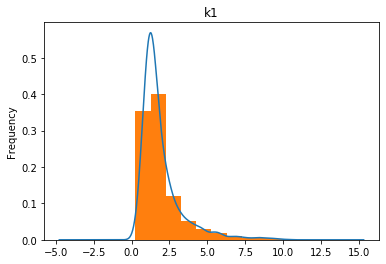

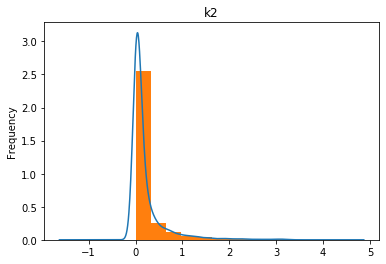

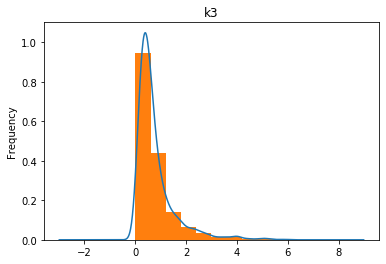

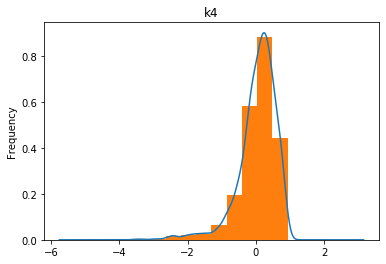

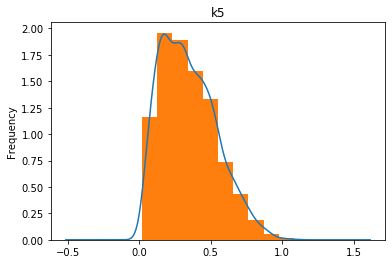

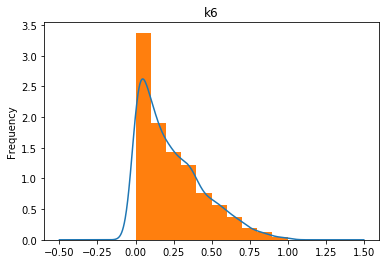

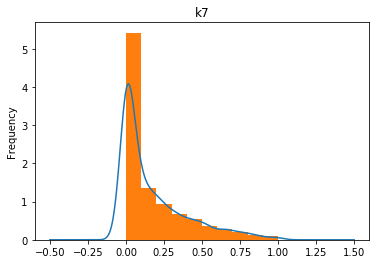

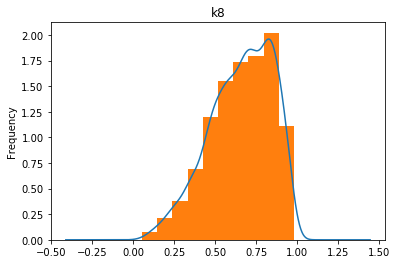

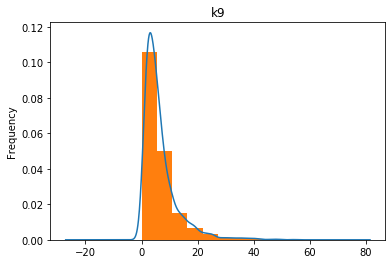

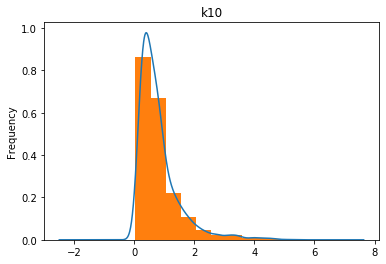

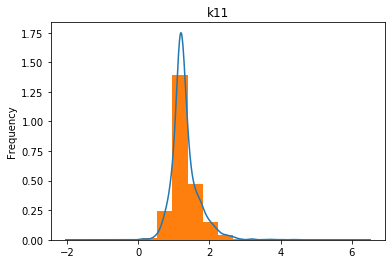

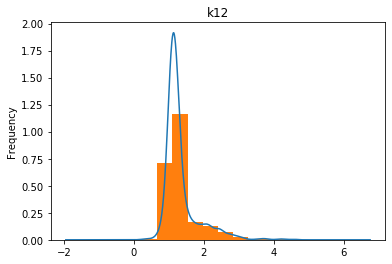

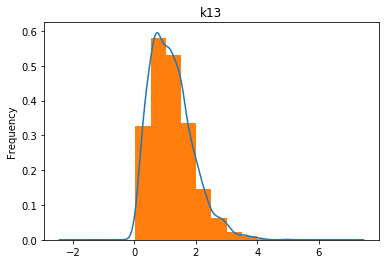

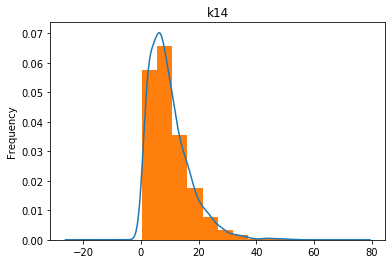

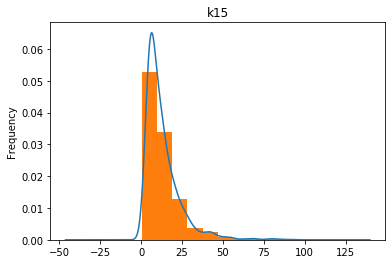

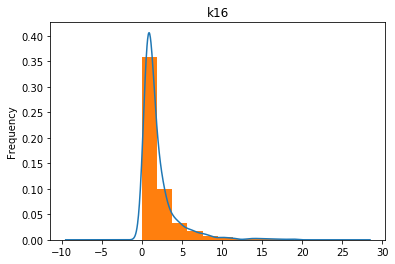

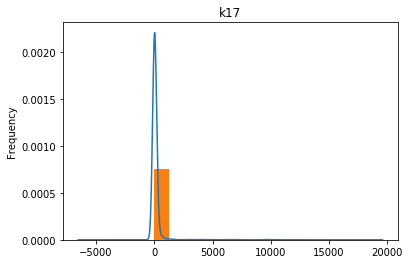

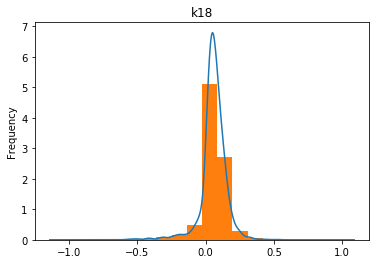

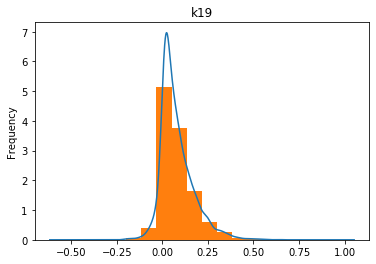

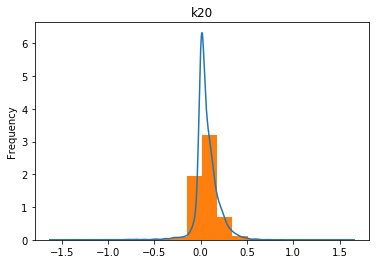

In [28]:
# graphical analysis
for k in data:
    data[k].plot.kde(title=k)  # kernel density estimation
    data[k].plot.hist(density=True)
    plt.show()

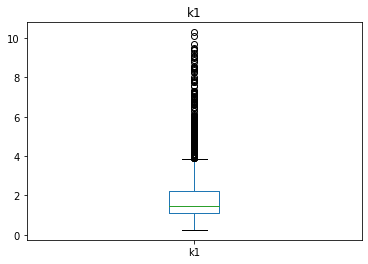

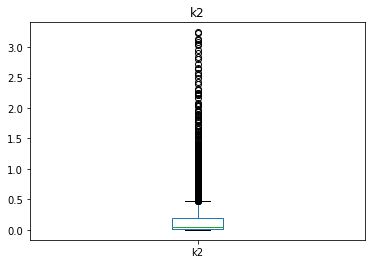

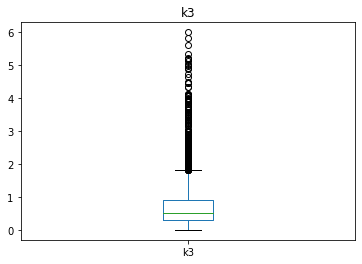

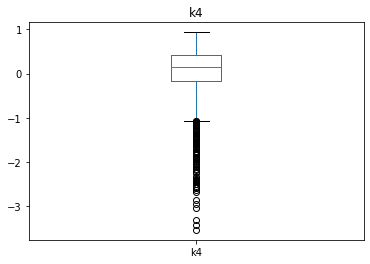

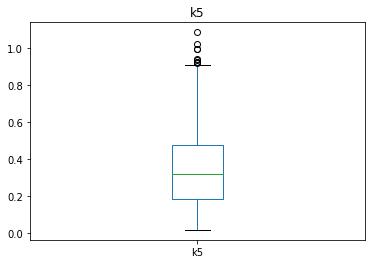

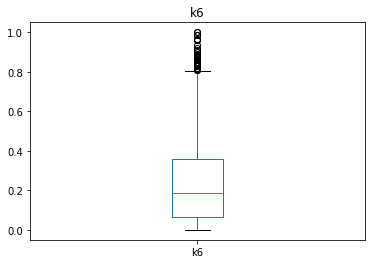

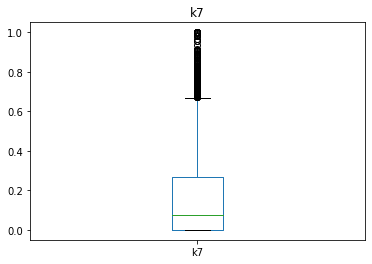

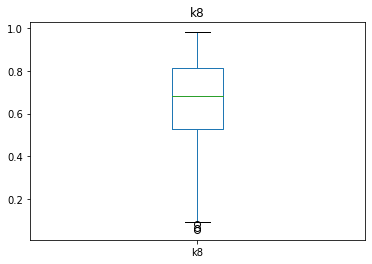

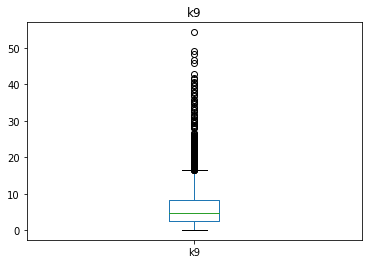

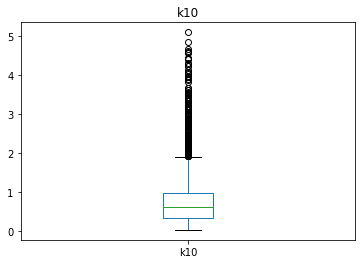

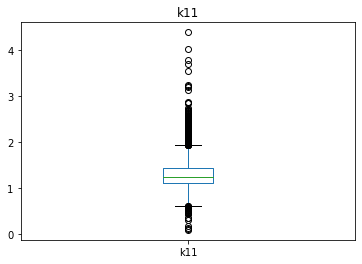

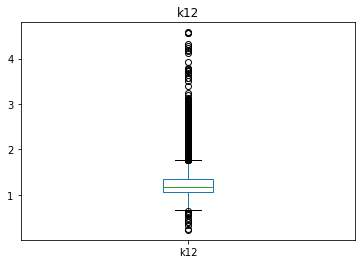

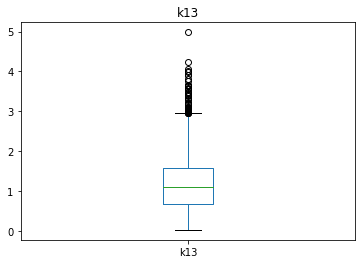

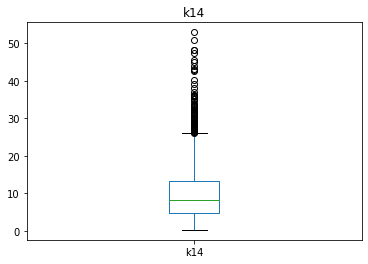

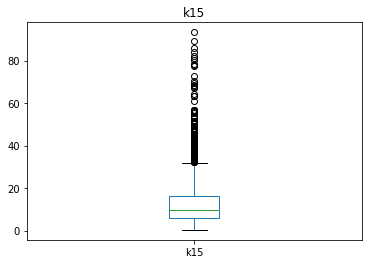

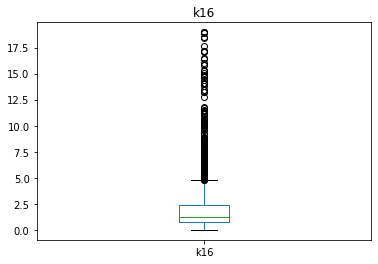

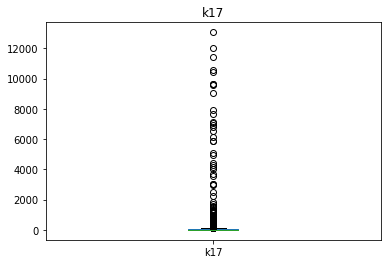

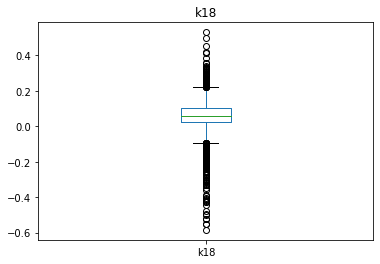

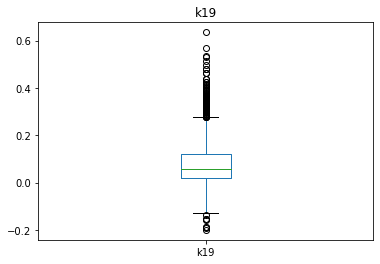

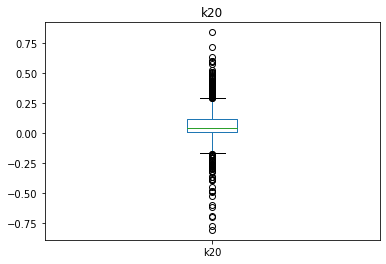

In [29]:
for k in data:
  data[k].plot.box(title=k)
  plt.show()

In [30]:
# six sigma rule
for k in data:
    temp = (np.abs(data[k] - data[k].mean())) > 6 * data[k].std()
    print('percentage of outliers of {:>3}: {:06.3f}%'.format(k, np.sum(temp) / len(temp) * 100))

percentage of outliers of  k1: 00.000%
percentage of outliers of  k2: 00.539%
percentage of outliers of  k3: 00.116%
percentage of outliers of  k4: 00.077%
percentage of outliers of  k5: 00.000%
percentage of outliers of  k6: 00.000%
percentage of outliers of  k7: 00.000%
percentage of outliers of  k8: 00.000%
percentage of outliers of  k9: 00.193%
percentage of outliers of k10: 00.039%
percentage of outliers of k11: 00.154%
percentage of outliers of k12: 00.193%
percentage of outliers of k13: 00.000%
percentage of outliers of k14: 00.039%
percentage of outliers of k15: 00.270%
percentage of outliers of k16: 00.424%
percentage of outliers of k17: 00.771%
percentage of outliers of k18: 00.231%
percentage of outliers of k19: 00.039%
percentage of outliers of k20: 00.193%


In [31]:
censor_data = []

# searching multiplier for 5-8% outliers, outliers is NaN
for k in data:
    coef = data[k].max() / data[k].std()
    temp = (np.abs(data[k] - data[k].mean())) > coef * data[k].std()
    delta = coef / 2
    count = 0
    
    while np.abs(np.sum(temp) / len(temp) - 0.065) > 1e-3 and count < 20:
        coef += -delta if np.sum(temp) / len(temp) < 0.065 else delta
        temp = (np.abs(data[k] - data[k].mean())) > coef * data[k].std()
        delta, count = delta / 2, count + 1
        
    print('percentage of outliers of {:>3} with multiplier {:.2f}: {:06.3f}%'
          .format(k, coef, np.sum(temp) / len(temp) * 100),)
    data[k] = data[k][(np.abs(data[k] - data[k].mean())) < coef * data[k].std()]  # censorship
    data[k] = (data[k] - data[k].min()) / (data[k].max() - data[k].min())  # normalization

percentage of outliers of  k1 with multiplier 1.73: 06.551%
percentage of outliers of  k2 with multiplier 1.51: 06.513%
percentage of outliers of  k3 with multiplier 1.72: 06.590%
percentage of outliers of  k4 with multiplier 1.51: 06.551%
percentage of outliers of  k5 with multiplier 1.68: 06.551%
percentage of outliers of  k6 with multiplier 1.81: 06.513%
percentage of outliers of  k7 with multiplier 2.03: 06.513%
percentage of outliers of  k8 with multiplier 1.69: 06.513%
percentage of outliers of  k9 with multiplier 1.69: 06.513%
percentage of outliers of k10 with multiplier 1.61: 06.551%
percentage of outliers of k11 with multiplier 1.83: 06.590%
percentage of outliers of k12 with multiplier 1.94: 06.474%
percentage of outliers of k13 with multiplier 1.64: 06.513%
percentage of outliers of k14 with multiplier 1.74: 06.435%
percentage of outliers of k15 with multiplier 1.54: 06.590%
percentage of outliers of k16 with multiplier 1.61: 06.435%
percentage of outliers of k17 with multi

In [32]:
# Close conections components
corr = data.corr()
print(corr)
print(corr[np.abs(corr - np.identity(len(corr))) > 0.95].idxmax().dropna())

           k1        k2        k3        k4        k5        k6        k7  \
k1   1.000000  0.534459  0.765396  0.673352 -0.468584 -0.146388 -0.225496   
k2   0.534459  1.000000  0.626959  0.409623 -0.280861 -0.141249 -0.284357   
k3   0.765396  0.626959  1.000000  0.516947 -0.335844 -0.127760 -0.214667   
k4   0.673352  0.409623  0.516947  1.000000 -0.636827 -0.084714 -0.247465   
k5  -0.468584 -0.280861 -0.335844 -0.636827  1.000000  0.006213  0.141835   
k6  -0.146388 -0.141249 -0.127760 -0.084714  0.006213  1.000000  0.381071   
k7  -0.225496 -0.284357 -0.214667 -0.247465  0.141835  0.381071  1.000000   
k8   0.460650  0.275288  0.332557  0.628413 -0.996390 -0.005179 -0.131492   
k9   0.443571  0.252053  0.337034  0.393526 -0.640457 -0.083613 -0.150008   
k10  0.112794  0.045889  0.108312  0.118484  0.412845 -0.053974 -0.028252   
k11  0.074000  0.109220  0.092100  0.015102  0.030142 -0.115874 -0.099039   
k12  0.123060  0.131681  0.137830  0.091467 -0.015386 -0.135829 -0.126316   

In [33]:
new_length = len(data) - np.max([data[k].isna().sum() for k in data])
censor_data = np.array([data[k].dropna().to_numpy()[:new_length] for k in data])
print(calculate_bartlett_sphericity(censor_data.T)) #chi-square statistic and p-value
print(calculate_kmo(censor_data.T)[1])  # factor analysis is applicable

(890.1636544890496, 2.0862179824982887e-91)
0.5764423980606405


/home/nekit/miniconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [43]:
eig_vals, eig_vecs = np.linalg.eig(corr)
eig_pairs = np.array(sorted(list(zip(eig_vals, eig_vecs)), key=lambda x: -x[0]))
eig_vals = eig_pairs[:, 0]
normalized = eig_vals / np.sum(eig_vals) * 100
pd.DataFrame(np.array([eig_vals, normalized, np.cumsum(normalized)]).T,
             columns=['eig_value', 'percent_var', 'cum_percent_var'])

,eig_value,percent_var,cum_percent_var
0,5.45889,27.2944,27.2944
1,3.12,15.6,42.8944
2,1.76978,8.84888,51.7433
3,1.45982,7.29912,59.0424
4,1.22196,6.10978,65.1522
5,1.11681,5.58403,70.7362
6,0.973294,4.86647,75.6027
7,0.833926,4.16963,79.7723
8,0.684075,3.42037,83.1927
9,0.603594,3.01797,86.2107


In [44]:
# principal component analysis
transform_matrix = np.array([*eig_pairs[:, 1][normalized > 5]])
new_data = censor_data.T.dot(transform_matrix.T).T
censor_data.shape, new_data.shape

((20, 2424), (6, 2424))

In [36]:
# from sklearn.cluster import KMeans
# 
# kmeans = KMeans(n_clusters=4).fit(censor_data.T)
# print(pd.DataFrame(kmeans.cluster_centers_.T))
# s = pd.Series(kmeans.predict(censor_data.T))
# def part(x):
#     return len(x) / len(s)
# print(s.groupby(s).aggregate(['count', part]))
# 
# for i in range(4):
#     cluster = pd.Series(censor_data.T[s == i].flatten())
#     print('\n', i + 1, 'cluster')
#     print(cluster.aggregate([np.mean, np.median, np.min, np.max, np.std]))
# 
# plt.show()
